## ASSIGNMENT - 02 - 002762173
## Project 2: Supervised learning with feature engineering 

In [622]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import re

In [623]:
#Reading the dataset into the dataframe
df = pd.read_csv('/Users/krishicagopalakrishnan/Desktop/Assignment -01/listings.csv')
df.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,126,2,657,2023-08-27,3.72,1,306,42,NaN
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,45,1,290,2023-08-04,1.77,1,0,21,NaN
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,57,30,122,2022-10-17,0.73,1,0,3,NaN
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,NaN,78704,30.26034,-97.76487,Entire home/apt,159,3,305,2023-09-04,2.09,1,156,17,NaN
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,NaN,78741,30.23466,-97.73682,Entire home/apt,48,4,51,2023-05-16,0.31,1,98,3,NaN


# 1. Data Imputation

In [624]:
#checking the number of null's and non null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14861 entries, 0 to 14860
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14861 non-null  int64  
 1   name                            14861 non-null  object 
 2   host_id                         14861 non-null  int64  
 3   host_name                       14859 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   14861 non-null  int64  
 6   latitude                        14861 non-null  float64
 7   longitude                       14861 non-null  float64
 8   room_type                       14861 non-null  object 
 9   price                           14861 non-null  int64  
 10  minimum_nights                  14861 non-null  int64  
 11  number_of_reviews               14861 non-null  int64  
 12  last_review                     

In [625]:
df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.486100e+04,1.486100e+04,0.0,14861.000000,14861.000000,14861.000000,14861.000000,14861.000000,14861.000000,11758.000000,14861.000000,14861.000000,14861.000000,0.0
mean,3.418962e+17,1.455670e+08,NaN,78724.538254,30.281061,-97.749786,269.298769,7.629365,37.843348,1.537180,11.047641,152.092591,10.367674,NaN
std,3.952050e+17,1.608509e+08,NaN,20.681156,0.065000,0.062634,549.376464,28.289063,79.894590,1.711574,24.472357,136.610382,17.111299,NaN
min,5.456000e+03,2.300000e+01,NaN,78701.000000,30.078440,-98.053350,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.401701e+07,1.613528e+07,NaN,78704.000000,30.241870,-97.768528,95.000000,1.000000,1.000000,0.260000,1.000000,1.000000,0.000000,NaN
50%,5.176864e+07,7.039337e+07,NaN,78723.000000,30.269160,-97.740600,150.000000,2.000000,8.000000,0.990000,2.000000,127.000000,2.000000,NaN
75%,7.543632e+17,2.537258e+08,NaN,78745.000000,30.309070,-97.716692,266.000000,3.000000,38.000000,2.260000,6.000000,302.000000,14.000000,NaN
max,9.770652e+17,5.363086e+08,NaN,78759.000000,30.518350,-97.559300,19286.000000,1124.000000,1141.000000,26.250000,136.000000,365.000000,258.000000,NaN


In [626]:
#checking if there are null values,#we could understand that the neighbourhood_group and license were null values
df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True
14857,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True
14858,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True
14859,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True


In [627]:
#counting the number of data actually available in the dataset and eventually checking the null's too
df.count()

id                                14861
name                              14861
host_id                           14861
host_name                         14859
neighbourhood_group                   0
neighbourhood                     14861
latitude                          14861
longitude                         14861
room_type                         14861
price                             14861
minimum_nights                    14861
number_of_reviews                 14861
last_review                       11758
reviews_per_month                 11758
calculated_host_listings_count    14861
availability_365                  14861
number_of_reviews_ltm             14861
license                               0
dtype: int64

In [628]:
#checking the total number of null values in the dataset, the columns in the dataset 'neighbourhood_group' and 'license'
#have empty and only null values
null_count = df.isnull().sum()
null_count

id                                    0
name                                  0
host_id                               0
host_name                             2
neighbourhood_group               14861
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3103
reviews_per_month                  3103
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           14861
dtype: int64

The host_name column,neighbourhood_group,reviews_per_month,last_review and license have the most null values out of which two columns haveonly null values.The information above determines that there are some null values even in the reviews per month and last reviews column as well

The last review columns determines the latest and the period in which the reviews have come in, since there are alread many missing values in it and we cannot randomly assign dates when the review has been made we can drop it.

In [629]:
#dropping the null values in license as well #since there were no data in neighbourhood group column
columns_to_drop = ['neighbourhood_group', 'license','last_review']
df = df.drop(columns=columns_to_drop)
df
# data.head(5)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,78702,30.260570,-97.734410,Entire home/apt,126,2,657,3.72,1,306,42
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,78729,30.456970,-97.784220,Private room,45,1,290,1.77,1,0,21
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,78704,30.248850,-97.735870,Entire home/apt,57,30,122,0.73,1,0,3
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,78704,30.260340,-97.764870,Entire home/apt,159,3,305,2.09,1,156,17
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,78741,30.234660,-97.736820,Entire home/apt,48,4,51,0.31,1,98,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,Home in Austin · ★New · 1 bedroom · 1 bed · 1 ...,292849645,Rami,78725,30.261390,-97.671764,Private room,50,1,0,NaN,5,269,0
14857,976810489807743834,Home in Austin · ★New · 4 bedrooms · 4 beds · ...,272515104,Ames - Austin Vacay,78723,30.306730,-97.688670,Entire home/apt,157,1,0,NaN,6,365,0
14858,976819043910196489,Home in Austin · ★New · 3 bedrooms · 4 beds · ...,387932846,Barclé Group,78721,30.258485,-97.689087,Entire home/apt,117,1,0,NaN,19,176,0
14859,976821657557908773,Home in Austin · ★New · 3 bedrooms · 3 beds · ...,536308631,Carl,78724,30.317040,-97.654112,Entire home/apt,133,2,0,NaN,1,268,0


In [630]:
# Calculate the mean of the "reviews_per_month" column, since it had some null values too and replacing it with a mean
mean_reviews_per_month = df['reviews_per_month'].mean()
mean_reviews_per_month



1.5371797924817208

In [631]:
# Replace missing values with the mean,to fill the dataset
df['reviews_per_month'] = df['reviews_per_month'].fillna(mean_reviews_per_month)


## Dropping all the duplicate columns

In [632]:
#dropping duplicate columns 
df.drop_duplicates()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,78702,30.260570,-97.734410,Entire home/apt,126,2,657,3.72000,1,306,42
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,78729,30.456970,-97.784220,Private room,45,1,290,1.77000,1,0,21
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,78704,30.248850,-97.735870,Entire home/apt,57,30,122,0.73000,1,0,3
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,78704,30.260340,-97.764870,Entire home/apt,159,3,305,2.09000,1,156,17
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,78741,30.234660,-97.736820,Entire home/apt,48,4,51,0.31000,1,98,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,Home in Austin · ★New · 1 bedroom · 1 bed · 1 ...,292849645,Rami,78725,30.261390,-97.671764,Private room,50,1,0,1.53718,5,269,0
14857,976810489807743834,Home in Austin · ★New · 4 bedrooms · 4 beds · ...,272515104,Ames - Austin Vacay,78723,30.306730,-97.688670,Entire home/apt,157,1,0,1.53718,6,365,0
14858,976819043910196489,Home in Austin · ★New · 3 bedrooms · 4 beds · ...,387932846,Barclé Group,78721,30.258485,-97.689087,Entire home/apt,117,1,0,1.53718,19,176,0
14859,976821657557908773,Home in Austin · ★New · 3 bedrooms · 3 beds · ...,536308631,Carl,78724,30.317040,-97.654112,Entire home/apt,133,2,0,1.53718,1,268,0


## Exploratory Data Analysis

### 1. Name column

In [633]:
#exploring the name column
unique_names = df['name'].unique()
unique_names


array(['Guesthouse in Austin · ★4.84 · 1 bedroom · 2 beds · 1 bath',
       'Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1 shared bath',
       'Guesthouse in Austin · ★4.97 · Studio · 1 bed · 1 bath', ...,
       'Rental unit in Austin · ★New · 6 bedrooms · 6 beds · 6 baths',
       'Home in West Lake Hills · ★New · 3 bedrooms · 5 beds · 2 baths',
       'Home in Austin · ★New · 4 bedrooms · 3 beds · 2.5 baths'],
      dtype=object)

In [634]:
# # Split the data into separate columns
# split_data = [item.split(' · ') for item in unique_names]
# split_data = np.array(split_data)

# # Create a DataFrame
# new_df = pd.DataFrame(split_data, columns=['property_type', 'rating', 'bedrooms', 'beds', 'bathrooms'])

# # Print the new DataFrame
# print(new_df)


In [635]:
# Creating the 'unique_names' NumPy array, to check how to extract the separate value fields from the name column and put
#into a new column
unique_names = np.array([
    'Guesthouse in Austin · ★4.84 · 1 bedroom · 2 beds · 1 bath',
    'Apartment in New York · ★4.92 · 2 bedrooms · 3 beds · 2 baths',
    'Villa in Miami · ★4.75 · 4 bedrooms · 6 beds · 3 baths'])

# Check the maximum number of elements in a split entry
max_num_elements = max(len(item.split(' · ')) for item in unique_names)

# Pad the elements with empty strings to ensure consistent shapes
split_data = [item.split(' · ') + [''] * (max_num_elements - len(item.split(' · '))) for item in unique_names]

# Create a DataFrame
new_df = pd.DataFrame(split_data, columns=['property_type', 'rating', 'bedrooms', 'beds', 'bathrooms'])

# Print the new DataFrame
print(new_df)


           property_type rating    bedrooms    beds bathrooms
0   Guesthouse in Austin  ★4.84   1 bedroom  2 beds    1 bath
1  Apartment in New York  ★4.92  2 bedrooms  3 beds   2 baths
2         Villa in Miami  ★4.75  4 bedrooms  6 beds   3 baths


In [636]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')


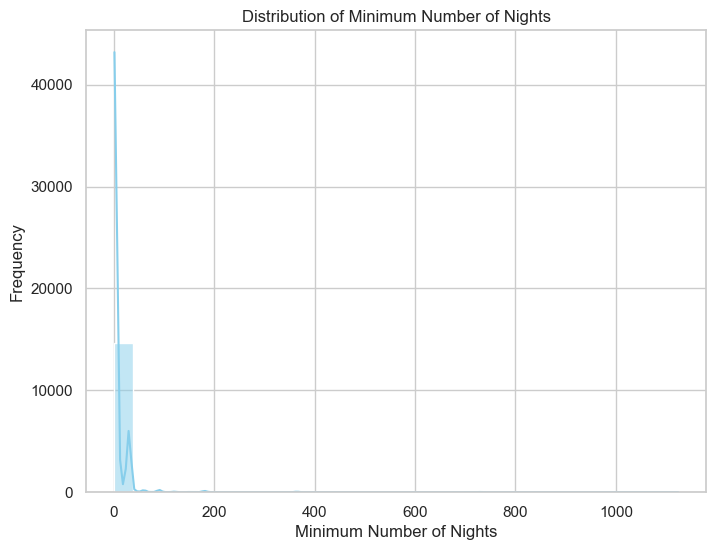

In [637]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(df['minimum_nights'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Minimum Number of Nights")
plt.xlabel("Minimum Number of Nights")
plt.ylabel("Frequency")
plt.show()


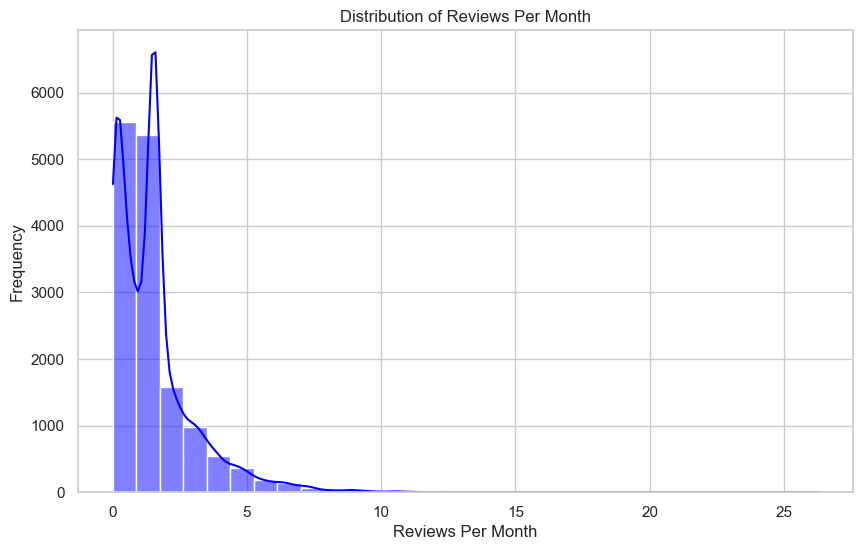

In [619]:
# Create a bar plot for reviews per month
plt.figure(figsize=(10, 6))
sns.histplot(df['reviews_per_month'], bins=30, kde=True, color='blue')
plt.title("Distribution of Reviews Per Month")
plt.xlabel("Reviews Per Month")
plt.ylabel("Frequency")
plt.show()

While I was exploring the name column i understood that this has a lot of sub categories present in the same column itself therefore we have to split it into multiple columns

In [638]:
#extracting the first string
df['Residence description'] = df['name'].str.split('·').str[0]
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Residence description
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,78702,30.26057,-97.73441,Entire home/apt,126,2,657,3.72,1,306,42,Guesthouse in Austin
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,78729,30.45697,-97.78422,Private room,45,1,290,1.77,1,0,21,Home in Austin
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,78704,30.24885,-97.73587,Entire home/apt,57,30,122,0.73,1,0,3,Guesthouse in Austin
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,78704,30.26034,-97.76487,Entire home/apt,159,3,305,2.09,1,156,17,Guesthouse in Austin
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,78741,30.23466,-97.73682,Entire home/apt,48,4,51,0.31,1,98,3,Guest suite in Austin


In [535]:
#extracting star ratings from the name column
df['Star ratings'] = df['name'].str.split('·').str[1]
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Residence description,Star ratings
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,78702,30.260570,-97.734410,Entire home/apt,126,2,657,3.72000,1,306,42,Guesthouse in Austin,★4.84
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,78729,30.456970,-97.784220,Private room,45,1,290,1.77000,1,0,21,Home in Austin,★4.90
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,78704,30.248850,-97.735870,Entire home/apt,57,30,122,0.73000,1,0,3,Guesthouse in Austin,★4.97
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,78704,30.260340,-97.764870,Entire home/apt,159,3,305,2.09000,1,156,17,Guesthouse in Austin,★4.97
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,78741,30.234660,-97.736820,Entire home/apt,48,4,51,0.31000,1,98,3,Guest suite in Austin,★4.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,Home in Austin · ★New · 1 bedroom · 1 bed · 1 ...,292849645,Rami,78725,30.261390,-97.671764,Private room,50,1,0,1.53718,5,269,0,Home in Austin,★New
14857,976810489807743834,Home in Austin · ★New · 4 bedrooms · 4 beds · ...,272515104,Ames - Austin Vacay,78723,30.306730,-97.688670,Entire home/apt,157,1,0,1.53718,6,365,0,Home in Austin,★New
14858,976819043910196489,Home in Austin · ★New · 3 bedrooms · 4 beds · ...,387932846,Barclé Group,78721,30.258485,-97.689087,Entire home/apt,117,1,0,1.53718,19,176,0,Home in Austin,★New
14859,976821657557908773,Home in Austin · ★New · 3 bedrooms · 3 beds · ...,536308631,Carl,78724,30.317040,-97.654112,Entire home/apt,133,2,0,1.53718,1,268,0,Home in Austin,★New


In [639]:
#extracting star ratings from the name column
df['Bedrooms'] = df['name'].str.split('·').str[2]
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Residence description,Bedrooms
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,78702,30.260570,-97.734410,Entire home/apt,126,2,657,3.72000,1,306,42,Guesthouse in Austin,1 bedroom
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,78729,30.456970,-97.784220,Private room,45,1,290,1.77000,1,0,21,Home in Austin,1 bedroom
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,78704,30.248850,-97.735870,Entire home/apt,57,30,122,0.73000,1,0,3,Guesthouse in Austin,Studio
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,78704,30.260340,-97.764870,Entire home/apt,159,3,305,2.09000,1,156,17,Guesthouse in Austin,1 bedroom
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,78741,30.234660,-97.736820,Entire home/apt,48,4,51,0.31000,1,98,3,Guest suite in Austin,1 bedroom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,Home in Austin · ★New · 1 bedroom · 1 bed · 1 ...,292849645,Rami,78725,30.261390,-97.671764,Private room,50,1,0,1.53718,5,269,0,Home in Austin,1 bedroom
14857,976810489807743834,Home in Austin · ★New · 4 bedrooms · 4 beds · ...,272515104,Ames - Austin Vacay,78723,30.306730,-97.688670,Entire home/apt,157,1,0,1.53718,6,365,0,Home in Austin,4 bedrooms
14858,976819043910196489,Home in Austin · ★New · 3 bedrooms · 4 beds · ...,387932846,Barclé Group,78721,30.258485,-97.689087,Entire home/apt,117,1,0,1.53718,19,176,0,Home in Austin,3 bedrooms
14859,976821657557908773,Home in Austin · ★New · 3 bedrooms · 3 beds · ...,536308631,Carl,78724,30.317040,-97.654112,Entire home/apt,133,2,0,1.53718,1,268,0,Home in Austin,3 bedrooms


In [537]:
#checking how many bedrooms are available in the  df['Bedroom'] = df['name'].str.extract(r'(\d+\s+(?:bedrooms|bedroom))', flags=re.IGNORECASE).fillna('No Bedroom')

df['Bedrooms'].unique()

array([' 1 bedroom ', ' Studio ', ' 2 bedrooms ', ' 3 bedrooms ',
       ' 5 bedrooms ', ' 1 bed ', ' 4 bedrooms ', ' 3 beds ', ' 2 beds',
       ' 2 beds ', ' 1 bed', ' 4 beds ', ' 6 beds ', ' 4 beds',
       ' 5 beds ', ' 8 bedrooms ', ' 16 beds ', nan, ' 6 bedrooms ',
       ' 1 private bath', ' 7 bedrooms ', ' 1 bath', ' 13 bedrooms ',
       ' 10 beds ', ' 8 beds ', ' 1.5 baths', ' 1 shared bath',
       ' 7 beds ', ' 2 baths', ' 15 bedrooms ', ' 23 bedrooms ',
       ' 9 beds ', ' 10 bedrooms ', ' 3 beds', ' 8 beds', ' 0 baths',
       ' 132 beds ', ' 11 beds ', ' 9 bedrooms ', ' 20 beds ',
       ' 24 beds ', ' 14 beds ', ' 14 bedrooms ', ' 3.5 baths',
       ' 18 beds ', ' 12 bedrooms ', ' 13 beds ', ' 15 beds ',
       ' 12 beds ', ' 5 baths', ' 17 beds ', ' 2.5 baths', ' 19 beds '],
      dtype=object)

In [538]:
# extract How many Beds are available if not listed in the name column it will be assumed there are no Beds
df['Beds'] = df['name'].str.extract(r'(\d+\s+(?:beds|bed))', flags=re.IGNORECASE).fillna('No Bed')

# Replace beds with bed
df['Beds'] = df['Beds'].str.replace(r'(\d+\s+)beds', r'\1bed', regex=True, flags=re.IGNORECASE)

In [539]:
#unique beds
df['Beds'].unique()

array(['1 bed', '2 bed', '3 bed', '5 bed', '4 bed', '8 bed', '16 bed',
       '6 bed', '7 bed', 'No Bed', '13 bed', '15 bed', '23 bed', '10 bed',
       '14 bed', '9 bed', '12 bed'], dtype=object)

In [540]:
# extracting and finding how many Bath are available if not listed in the name column it will be assumed there are no Bath
df['Bath'] = df['name'].str.extract(r'(\d+\s+(?:Bath|Baths))', flags=re.IGNORECASE).fillna('0 bath')

In [462]:
df['Bath'].unique()

array(['1 bath', '0 bath', '2 bath', '5 bath', '3 bath', '4 bath',
       '8 bath', '6 bath', '17 bath', '7 bath', '10 bath', '12 bath'],
      dtype=object)

In [541]:
#finding out how many different kinds of baths are available in this dataset
df['Bath'].nunique()


12

In [542]:
# Extracting the available ratings from column name if there is none it will be replaced with No Rating,since it had a star 
df['Rating'] = df['name'].str.extract(r'\★(\d+\.\d+)', flags=re.IGNORECASE).fillna('No Rating')

In [543]:
df['Rating'].unique()

array(['4.84', '4.90', '4.97', '4.56', '5.0', '4.94', '4.91', '4.87',
       '4.92', '4.88', '4.96', '4.98', '4.89', '4.82', 'No Rating',
       '4.68', '4.99', '4.20', '4.86', '4.78', '4.81', '4.71', '4.25',
       '4.67', '4.73', '4.57', '4.83', '4.63', '4.93', '4.95', '4.61',
       '4.69', '4.77', '4.80', '4.85', '4.75', '4.79', '4.74', '4.72',
       '4.38', '4.54', '3.75', '4.70', '4.33', '4.76', '4.64', '4.60',
       '4.52', '4.65', '4.47', '4.55', '3.71', '3.67', '4.62', '4.50',
       '4.40', '4.27', '4.49', '4.0', '3.63', '4.59', '4.17', '4.43',
       '4.31', '4.24', '4.48', '4.44', '4.45', '4.34', '4.42', '3.80',
       '4.66', '4.07', '4.29', '4.15', '4.51', '4.46', '4.53', '4.37',
       '0.0', '4.58', '4.13', '4.35', '4.22', '3.0', '2.0', '4.39',
       '4.30', '3.50', '3.20', '3.83', '3.33', '4.41', '4.21', '4.26',
       '4.05', '3.60', '4.09', '3.40', '3.93', '4.11', '3.38', '3.69',
       '3.99', '4.32', '4.14', '3.82', '4.23', '4.18', '4.36', '4.10',
       '2.67',

In [544]:
#the number of unique rating values that are available
df['Rating'].nunique()

125

In [545]:
# Extract accommodation types from column name if there is none it will be replace with Unknown
df['Type'] = df['name'].str.extract(r'(.+)\s+in', flags=re.IGNORECASE).fillna('Unknown')


In [468]:
df['Type'].nunique()

39

In [571]:
#Exploring the Location column and extracting it separately
# Extract location from column name if there is none it will be replace with Unkown
df['Location'] = df['name'].str.extract(r'\bin\b\s+(.+?)\s+·', flags=re.IGNORECASE).fillna('Unkown')
# capitalize the first letter
df['Location'] = df['Location'].str.title()
# remove special character and remove unnecessary spaces
df['Location'] = df['Location'].str.replace(r'[^0-9a-zA-Z]', ' ',regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()


In [547]:
df['Location'].unique()

array(['Austin', 'Austin Texas', 'West Lake Hills', 'Lakeway',
       'The Hills', 'Bee Cave', 'Sunset Valley', 'Dripping Springs',
       'Spicewood', 'Manchaca', 'Rollingwood', 'Westlake Hills Austin',
       'Del Valle', 'Westlake Hills', 'Clarksville', 'Texas',
       'Lake Travis', 'Round Rock', 'Travis County', 'Buda',
       'Pflugerville', 'Manor', 'East Austin', 'Briarcliff',
       'Hays County', 'Smith County'], dtype=object)

In [548]:
df['Location'].nunique()

26

In [549]:
#adding the rows to the data frame
df['first_string'] = df['name'].str.split('·').str[0]
df['Star ratings'] = df['name'].str.split('·').str[1]
df['Bedrooms'] = df['name'].str.split('·').str[2]
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,number_of_reviews_ltm,Residence description,Star ratings,Bedrooms,Beds,Bath,Rating,Type,Location,first_string
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,78702,30.260570,-97.734410,Entire home/apt,126,2,...,42,Guesthouse in Austin,★4.84,1 bedroom,1 bed,1 bath,4.84,Guesthouse,Austin,Guesthouse in Austin
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,78729,30.456970,-97.784220,Private room,45,1,...,21,Home in Austin,★4.90,1 bedroom,1 bed,0 bath,4.90,Home,Austin,Home in Austin
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,78704,30.248850,-97.735870,Entire home/apt,57,30,...,3,Guesthouse in Austin,★4.97,Studio,1 bed,1 bath,4.97,Guesthouse,Austin,Guesthouse in Austin
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,78704,30.260340,-97.764870,Entire home/apt,159,3,...,17,Guesthouse in Austin,★4.97,1 bedroom,1 bed,1 bath,4.97,Guesthouse,Austin,Guesthouse in Austin
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,78741,30.234660,-97.736820,Entire home/apt,48,4,...,3,Guest suite in Austin,★4.56,1 bedroom,1 bed,1 bath,4.56,Guest suite,Austin,Guest suite in Austin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,Home in Austin · ★New · 1 bedroom · 1 bed · 1 ...,292849645,Rami,78725,30.261390,-97.671764,Private room,50,1,...,0,Home in Austin,★New,1 bedroom,1 bed,1 bath,No Rating,Home,Austin,Home in Austin
14857,976810489807743834,Home in Austin · ★New · 4 bedrooms · 4 beds · ...,272515104,Ames - Austin Vacay,78723,30.306730,-97.688670,Entire home/apt,157,1,...,0,Home in Austin,★New,4 bedrooms,4 bed,2 bath,No Rating,Home,Austin,Home in Austin
14858,976819043910196489,Home in Austin · ★New · 3 bedrooms · 4 beds · ...,387932846,Barclé Group,78721,30.258485,-97.689087,Entire home/apt,117,1,...,0,Home in Austin,★New,3 bedrooms,3 bed,5 bath,No Rating,Home,Austin,Home in Austin
14859,976821657557908773,Home in Austin · ★New · 3 bedrooms · 3 beds · ...,536308631,Carl,78724,30.317040,-97.654112,Entire home/apt,133,2,...,0,Home in Austin,★New,3 bedrooms,3 bed,2 bath,No Rating,Home,Austin,Home in Austin


In [550]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'Residence description', 'Star ratings',
       'Bedrooms', 'Beds', 'Bath', 'Rating', 'Type', 'Location',
       'first_string'],
      dtype='object')


In [551]:
#columns to drop after imputation and cleaning
# columns_to_drop_imp = ['name','neighbourhood']
# df = df.drop(columns=columns_to_drop_imp,axis = 1)
df


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,number_of_reviews_ltm,Residence description,Star ratings,Bedrooms,Beds,Bath,Rating,Type,Location,first_string
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,78702,30.260570,-97.734410,Entire home/apt,126,2,...,42,Guesthouse in Austin,★4.84,1 bedroom,1 bed,1 bath,4.84,Guesthouse,Austin,Guesthouse in Austin
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,78729,30.456970,-97.784220,Private room,45,1,...,21,Home in Austin,★4.90,1 bedroom,1 bed,0 bath,4.90,Home,Austin,Home in Austin
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,78704,30.248850,-97.735870,Entire home/apt,57,30,...,3,Guesthouse in Austin,★4.97,Studio,1 bed,1 bath,4.97,Guesthouse,Austin,Guesthouse in Austin
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,78704,30.260340,-97.764870,Entire home/apt,159,3,...,17,Guesthouse in Austin,★4.97,1 bedroom,1 bed,1 bath,4.97,Guesthouse,Austin,Guesthouse in Austin
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,78741,30.234660,-97.736820,Entire home/apt,48,4,...,3,Guest suite in Austin,★4.56,1 bedroom,1 bed,1 bath,4.56,Guest suite,Austin,Guest suite in Austin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,Home in Austin · ★New · 1 bedroom · 1 bed · 1 ...,292849645,Rami,78725,30.261390,-97.671764,Private room,50,1,...,0,Home in Austin,★New,1 bedroom,1 bed,1 bath,No Rating,Home,Austin,Home in Austin
14857,976810489807743834,Home in Austin · ★New · 4 bedrooms · 4 beds · ...,272515104,Ames - Austin Vacay,78723,30.306730,-97.688670,Entire home/apt,157,1,...,0,Home in Austin,★New,4 bedrooms,4 bed,2 bath,No Rating,Home,Austin,Home in Austin
14858,976819043910196489,Home in Austin · ★New · 3 bedrooms · 4 beds · ...,387932846,Barclé Group,78721,30.258485,-97.689087,Entire home/apt,117,1,...,0,Home in Austin,★New,3 bedrooms,3 bed,5 bath,No Rating,Home,Austin,Home in Austin
14859,976821657557908773,Home in Austin · ★New · 3 bedrooms · 3 beds · ...,536308631,Carl,78724,30.317040,-97.654112,Entire home/apt,133,2,...,0,Home in Austin,★New,3 bedrooms,3 bed,2 bath,No Rating,Home,Austin,Home in Austin


In [475]:
#since we have a fixed set of areas to where these values are available in the dataset,im choosing to omit the LAT
#and LONG values and only focus on the factors that are affecting the prices in these areas


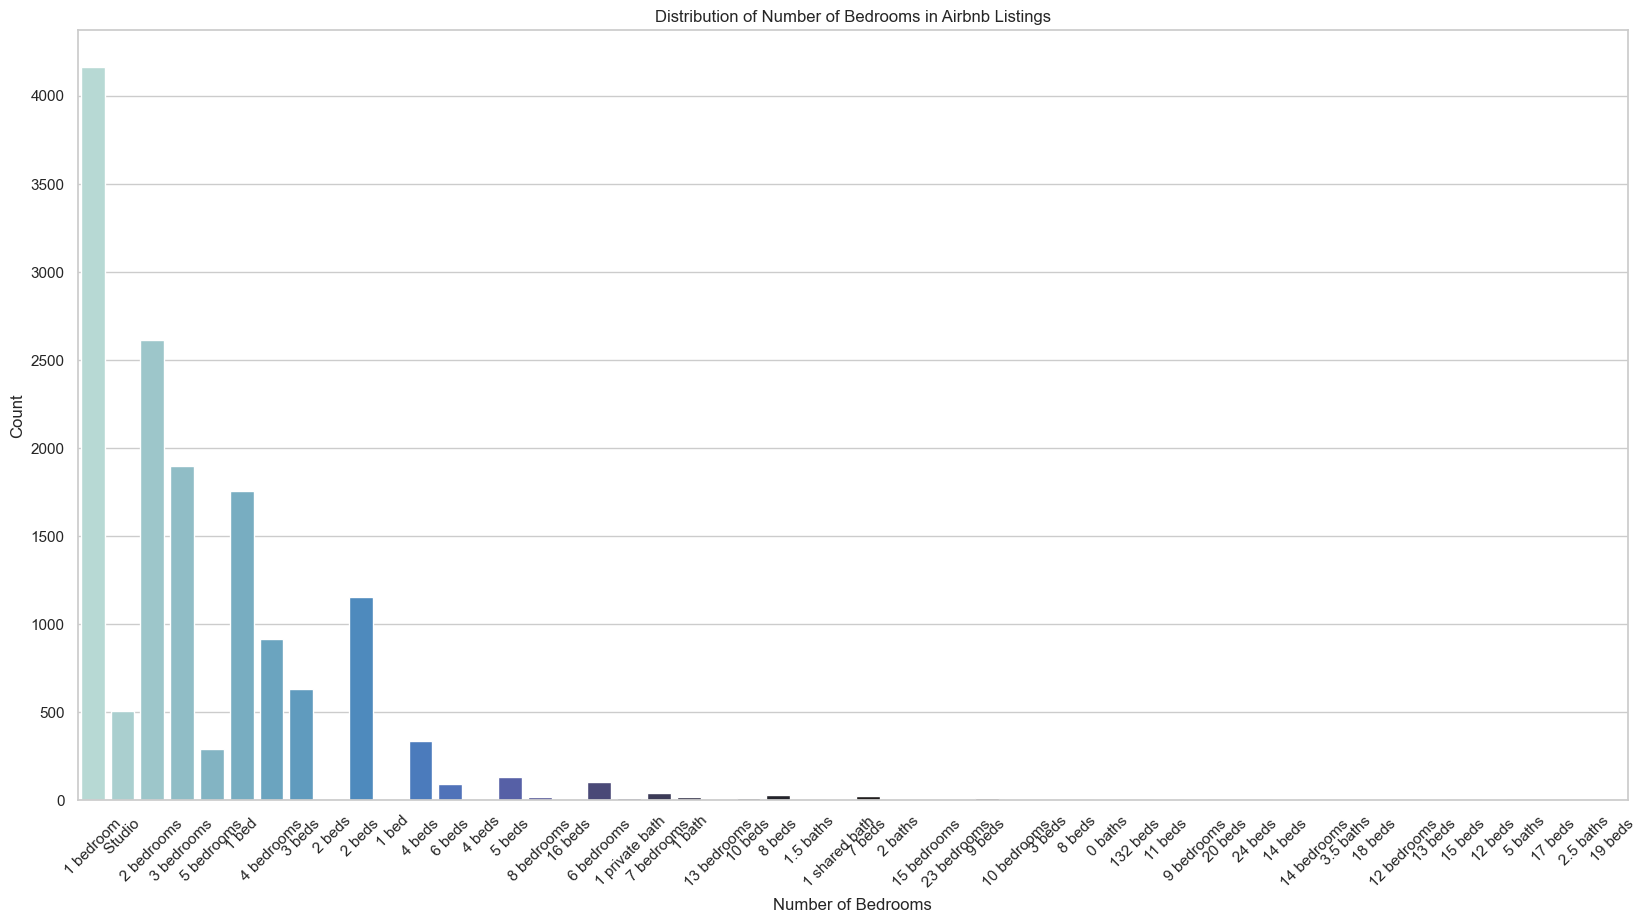

In [640]:
#Exploring the bedrooms and listings together
sns.set(style="whitegrid")

# Create a countplot
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='Bedrooms', palette='icefire')

# Set labels and title
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.title("Distribution of Number of Bedrooms in Airbnb Listings")

# Show the plot
plt.xticks(rotation=45)
plt.show()


From the distribution it is clear that the one BHK apartments are the most in the dataset distribution

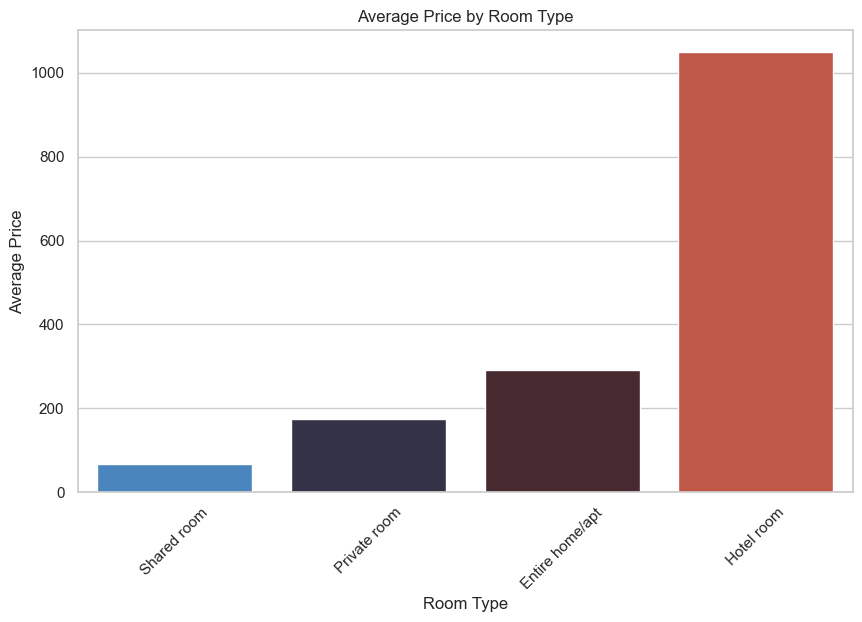

In [553]:
#Average Price by Room Type
avg_price_by_room_type = df.groupby('room_type')['price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_room_type.index, y=avg_price_by_room_type.values, palette='icefire')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

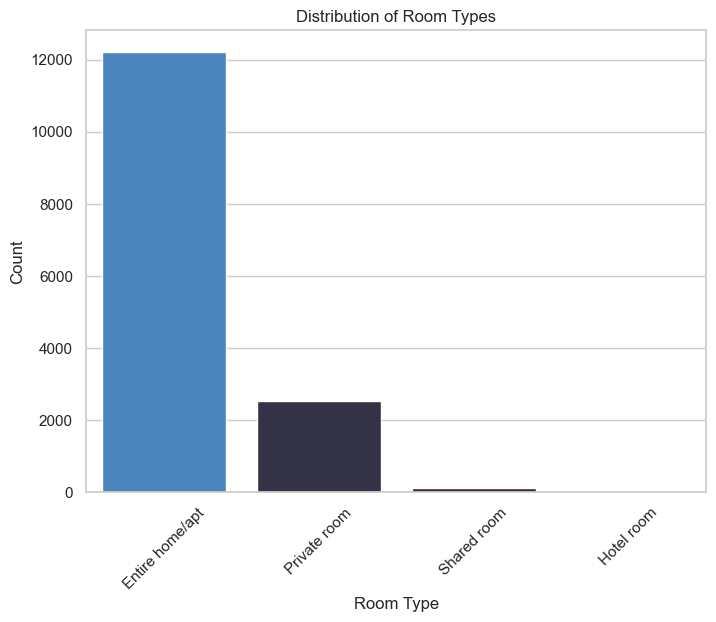

In [554]:
#Distribution of Room Types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='room_type', palette='icefire')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

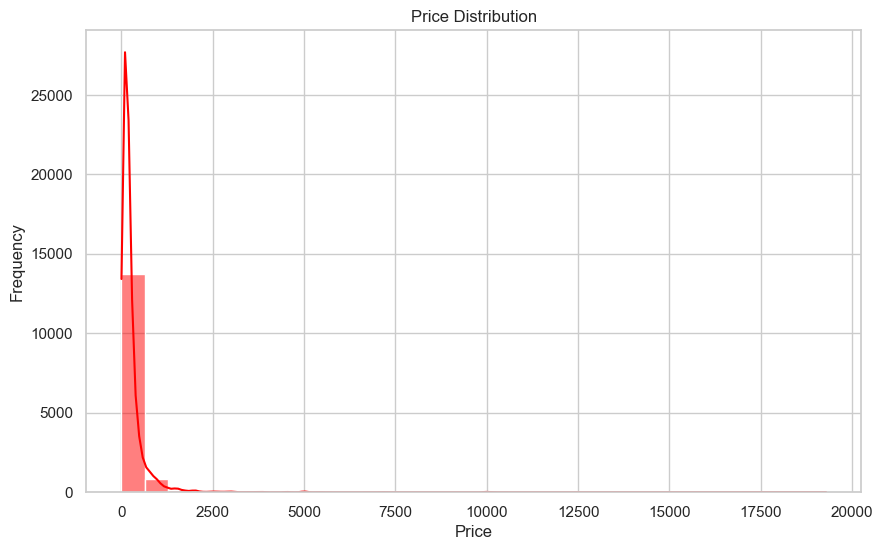

In [555]:
#Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='Red')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

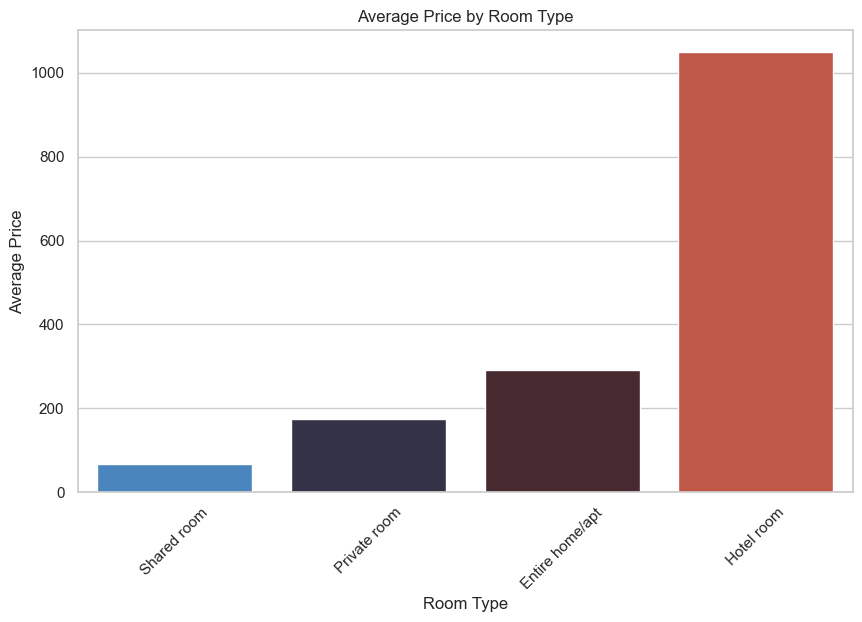

In [556]:
#Average Price by room type
avg_price_by_room_type = df.groupby('room_type')['price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_room_type.index, y=avg_price_by_room_type.values, palette='icefire')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

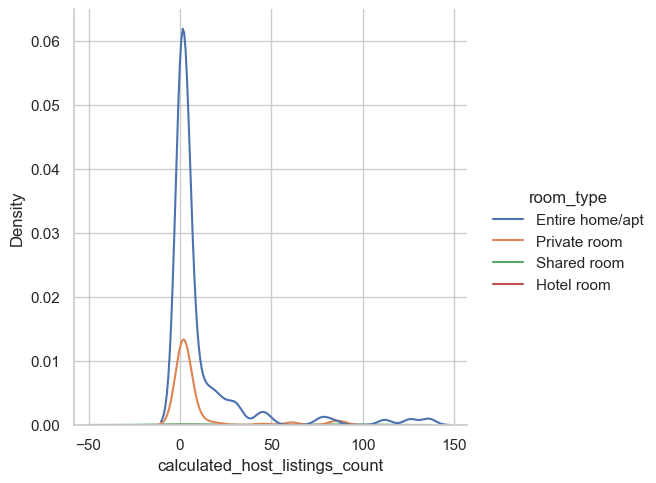

In [651]:
#calculated host listinfs count
sns.displot(data=df, x='calculated_host_listings_count', hue='room_type', kind='kde')

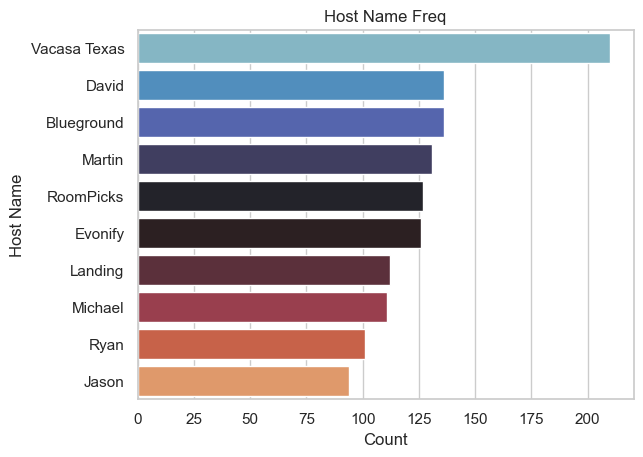

In [558]:
#how much have the hosts,hosted the maximum number of times
axis=sns.countplot(data=df, y='host_name', order=df.host_name.value_counts().nlargest(10).index, palette='icefire')
for label in axis.containers:
    ax.bar_label(label)
plt.title('Host Name Freq')
plt.xlabel('Count')
plt.ylabel('Host Name')
plt.show()


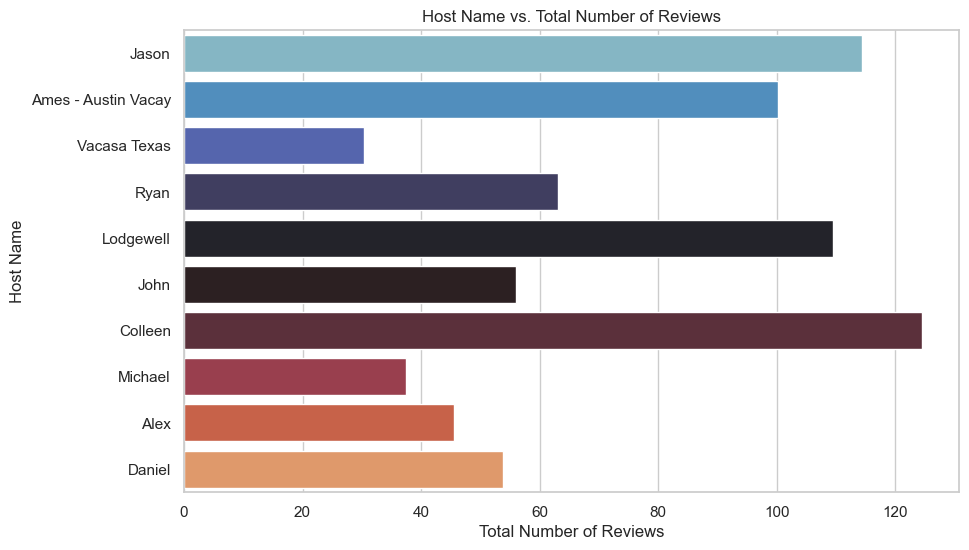

In [559]:
#comparing how the hosts did with their reviews 
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='number_of_reviews', y='host_name', ci=None, palette='icefire', order=df.groupby('host_name')['number_of_reviews'].sum().nlargest(10).index)
plt.title('Host Name vs. Total Number of Reviews')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Host Name')
plt.show()

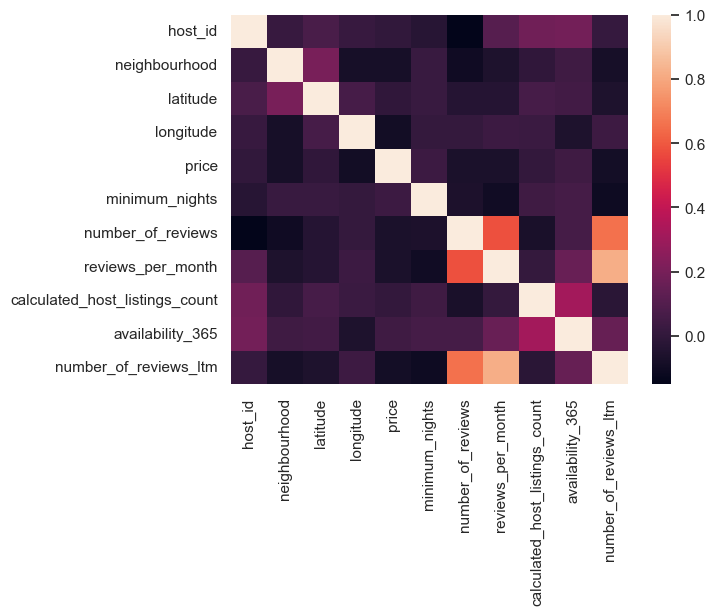

In [560]:
#visualizing the heatmap of all the features
dataplot = sns.heatmap(df.iloc[:,1:].corr())
plt.show()

## FEATURE SCALING 

In [587]:
#Columns not needed for our analysis
df.drop('id', axis=1, inplace=True)
df.drop('host_name', axis=1, inplace=True)
df.drop('latitude', axis=1, inplace=True)
df.drop('longitude', axis=1, inplace=True)
df.drop('host_id', axis=1, inplace=True)
df.drop('first_string',axis=1,inplace=True)
df.drop('room_type',axis=1,inplace=True)
df.drop('Residence description,Location',axis=1,inplace=True)


df.drop('Bedrooms', axis=1, inplace=True)
df.drop('Residence description', axis=1, inplace=True)
df.drop('Beds', axis=1, inplace=True)
df.drop('Bath', axis=1, inplace=True)
df.drop('Rating', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('Type',axis=1,inplace=True)
df.drop('Star ratings',axis=1,inplace=True)
df.drop('Residence description,Location',axis=1,inplace=True)
df.drop('Location',axis=1,inplace = True)
df.drop('first_string',axis=1,inplace=True)
df.drop('neighbourhood',axis=1,inplace=True)
df.drop('number_of_reviews_Itm',axis=1,inplace=True)
df



,id,host_id,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5456,8028,78702,126,2,657,3.72000,1,306,42
1,5769,8186,78729,45,1,290,1.77000,1,0,21
2,6413,13879,78704,57,30,122,0.73000,1,0,3
3,6448,14156,78704,159,3,305,2.09000,1,156,17
4,8502,25298,78741,48,4,51,0.31000,1,98,3
...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,292849645,78725,50,1,0,1.53718,5,269,0
14857,976810489807743834,272515104,78723,157,1,0,1.53718,6,365,0
14858,976819043910196489,387932846,78721,117,1,0,1.53718,19,176,0
14859,976821657557908773,536308631,78724,133,2,0,1.53718,1,268,0


In [588]:
df

,id,host_id,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5456,8028,78702,126,2,657,3.72000,1,306,42
1,5769,8186,78729,45,1,290,1.77000,1,0,21
2,6413,13879,78704,57,30,122,0.73000,1,0,3
3,6448,14156,78704,159,3,305,2.09000,1,156,17
4,8502,25298,78741,48,4,51,0.31000,1,98,3
...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,292849645,78725,50,1,0,1.53718,5,269,0
14857,976810489807743834,272515104,78723,157,1,0,1.53718,6,365,0
14858,976819043910196489,387932846,78721,117,1,0,1.53718,19,176,0
14859,976821657557908773,536308631,78724,133,2,0,1.53718,1,268,0


In [589]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood                     0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [590]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(df["reviews_per_month"].mean())

In [591]:
df

,id,host_id,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5456,8028,78702,126,2,657,3.72000,1,306,42
1,5769,8186,78729,45,1,290,1.77000,1,0,21
2,6413,13879,78704,57,30,122,0.73000,1,0,3
3,6448,14156,78704,159,3,305,2.09000,1,156,17
4,8502,25298,78741,48,4,51,0.31000,1,98,3
...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,292849645,78725,50,1,0,1.53718,5,269,0
14857,976810489807743834,272515104,78723,157,1,0,1.53718,6,365,0
14858,976819043910196489,387932846,78721,117,1,0,1.53718,19,176,0
14859,976821657557908773,536308631,78724,133,2,0,1.53718,1,268,0


In [592]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[['neighbourhood', 'host_id']] = df[['neighbourhood', 'host_id']].apply(le.fit_transform)
df

,id,host_id,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5456,5,1,126,2,657,3.72000,1,306,42
1,5769,6,16,45,1,290,1.77000,1,0,21
2,6413,9,3,57,30,122,0.73000,1,0,3
3,6448,10,3,159,3,305,2.09000,1,156,17
4,8502,14,27,48,4,51,0.31000,1,98,3
...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,7444,12,50,1,0,1.53718,5,269,0
14857,976810489807743834,7345,10,157,1,0,1.53718,6,365,0
14858,976819043910196489,7894,8,117,1,0,1.53718,19,176,0
14859,976821657557908773,8833,11,133,2,0,1.53718,1,268,0


In [593]:
#setting the input and output variable and dropping,y = df["price"]
X = df.drop(['price'], axis=1)

In [641]:
#displaying the dataset
X.head()

,id,host_id,neighbourhood,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5456,5,1,2,657,3.72,1,306,42
1,5769,6,16,1,290,1.77,1,0,21
2,6413,9,3,30,122,0.73,1,0,3
3,6448,10,3,3,305,2.09,1,156,17
4,8502,14,27,4,51,0.31,1,98,3


In [595]:
y.head()

0    126
1     45
2     57
3    159
4     48
Name: price, dtype: int64

## SCALING

In [607]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(X_scaled, columns=X.columns)
scaled_data

,id,host_id,neighbourhood,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,-0.865140,-1.825565,-1.023470,-0.199001,7.749930,1.433831e+00,-0.410585,1.126654,1.848684
1,-0.865140,-1.825183,0.003612,-0.234352,3.156223,1.529328e-01,-0.410585,-1.113369,0.621384
2,-0.865140,-1.824037,-0.886525,0.790814,1.053381,-5.302130e-01,-0.410585,-1.113369,-0.430588
3,-0.865140,-1.823655,-0.886525,-0.163651,3.343977,3.631315e-01,-0.410585,0.028604,0.387612
4,-0.865140,-1.822127,0.756806,-0.128300,0.164681,-8.060988e-01,-0.410585,-0.395976,-0.430588
...,...,...,...,...,...,...,...,...,...
14856,1.605508,1.016133,-0.270276,-0.234352,-0.473682,3.354657e-15,-0.247130,0.855801,-0.605917
14857,1.606598,0.978315,-0.407220,-0.234352,-0.473682,3.354657e-15,-0.206266,1.558553,-0.605917
14858,1.606620,1.188033,-0.544165,-0.234352,-0.473682,3.354657e-15,0.324964,0.175010,-0.605917
14859,1.606626,1.546731,-0.338748,-0.199001,-0.473682,3.354657e-15,-0.410585,0.848481,-0.605917


In [ ]:
## MODEL SELECTION AND 

In [611]:
from sklearn.linear_model import LinearRegression

# Assuming you have a target variable 'y' for regression
out = y

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model with the scaled features and target variable
model.fit(scaled_data, out)

# Make predictions
y_pred = model.predict(scaled_data)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
print(mse)

294711.54781731893


In [642]:
#displaying the correlation dataset
df.iloc[:, 1:].corr()

,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
host_id,1.000000,0.016759,0.073009,0.017182,0.000492,-0.033235,-0.150401,0.107355,0.180548,0.189517,0.011778
neighbourhood,0.016759,1.000000,0.203059,-0.082543,-0.081904,0.020686,-0.105226,-0.060483,-0.003266,0.042413,-0.082270
latitude,0.073009,0.203059,1.000000,0.063492,-0.002656,0.023207,-0.036500,-0.036707,0.062063,0.048877,-0.056670
longitude,0.017182,-0.082543,0.063492,1.000000,-0.096424,0.010202,0.008044,0.031653,0.026259,-0.058736,0.034392
price,0.000492,-0.081904,-0.002656,-0.096424,1.000000,0.030192,-0.066338,-0.068959,0.005780,0.039775,-0.088686
minimum_nights,-0.033235,0.020686,0.023207,0.010202,0.030192,1.000000,-0.062398,-0.097914,0.040795,0.059605,-0.108302
number_of_reviews,-0.150401,-0.105226,-0.036500,0.008044,-0.066338,-0.062398,1.000000,0.579697,-0.069794,0.056427,0.654656
reviews_per_month,0.107355,-0.060483,-0.036707,0.031653,-0.068959,-0.097914,0.579697,1.000000,0.009480,0.158037,0.816007
calculated_host_listings_count,0.180548,-0.003266,0.062063,0.026259,0.005780,0.040795,-0.069794,0.009480,1.000000,0.313838,-0.023407
availability_365,0.189517,0.042413,0.048877,-0.058736,0.039775,0.059605,0.056427,0.158037,0.313838,1.000000,0.152268


## TRAIN TEST SPLIT

In [644]:
#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [598]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

errors = mean_squared_error(y_test, y_pred, squared=False)
errors

649.8234844519113

## Linear Regression 

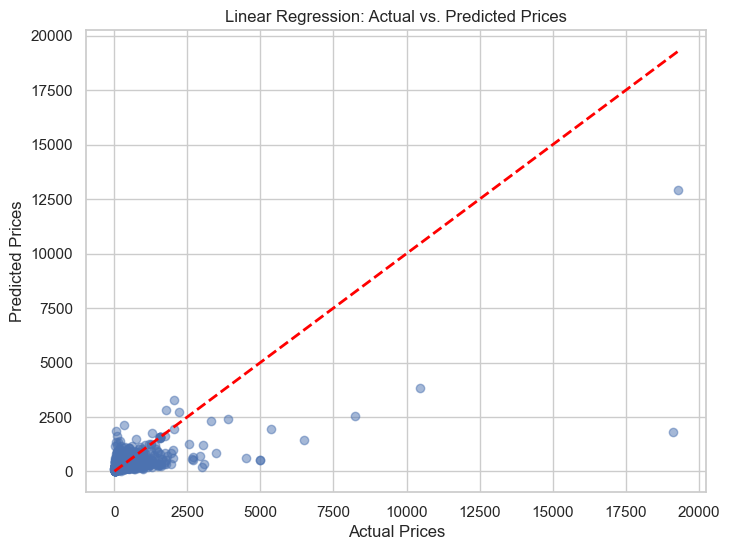

In [649]:
#linear regrssion plot

import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha adds transparency for overlapping points

# Add a regression line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

# Set labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs. Predicted Prices")

# Show the plot
plt.grid(True)
plt.show()


In [650]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2


0.4457061240074265

## RandomForest Regressor

In [646]:
from sklearn.ensemble import RandomForestRegressor
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fit the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluation the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 243302.13468763494
R-squared (R2) Score: 0.4457061240074265


## Crossvalidation Score

In [605]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Create a list of regression models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Support Vector Machine", SVR())
]

# Evaluate and compare the models using cross-validation
for name, model in models:
    mse_scores = -cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
    rmse_scores = np.sqrt(mse_scores)
    r2_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
    
    print(f"Model: {name}")
    print(f"Mean MSE: {mse_scores.mean()}")
    print(f"Mean RMSE: {rmse_scores.mean()}")
    print(f"Mean R-squared (R2): {r2_scores.mean()}")
    print("\n")


Model: Linear Regression
Mean MSE: 303784.8660705647
Mean RMSE: 536.1159379284356
Mean R-squared (R2): -0.02115323358249095


Model: Random Forest
Mean MSE: 305116.6615503769
Mean RMSE: 544.0695572464003
Mean R-squared (R2): -0.11954555150164344


Model: Decision Tree
Mean MSE: 536864.669629107
Mean RMSE: 720.666688358904
Mean R-squared (R2): -1.013279837182329


Model: Support Vector Machine
Mean MSE: 315677.3681770234
Mean RMSE: 545.7890973432726
Mean R-squared (R2): -0.05201388428118907


